# Изучение рынка заведений общественного питания Москвы
Автор: Каримова Эльвира Ильгизовна 😊

## Цель и задачи  

**Цель:** Провести исследовательский анализ данных рынка Москвы для инвесторов из фонда **Shut Up and Take My Money**, которые планируют открыть заведение общественного питания в Москве.

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
4. Сформулировать выводы по проведённому анализу.


## Описание данных

Файл `rest_info` содержит информацию о заведениях общественного питания:
Файл `rest_price` содержит информацию о среднем чеке в заведениях общественного питания:
## Структура проекта

1. Загрузка данных и знакомство с ними.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Итоговые выводы.

## Шаг 1. Загрузка данных и знакомство с ними

Начнём с загрузки библиотек и датасетов `rest_info` и `rest_price`. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik_matrix для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: `rest_info` и `rest_price`.

In [1]:
# Импортируем библиотеки
import notebook
import pandas as pd
import re
import numpy as np

# Загружаем библиотеки для визуализации данных
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
!pip install phik
import phik
from phik.report import plot_correlation_matrix


# Вывод версий библиотек
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)
print("matplotlib version:", matplotlib.__version__)  
print("Seaborn version:", sns.__version__)
print("Phi_K version:", phik.__version__)

print(notebook.__version__)

Defaulting to user installation because normal site-packages is not writeable
Pandas version: 2.2.2
NumPy version: 1.26.4
matplotlib version: 3.9.2
Seaborn version: 0.13.2
Phi_K version: 0.12.4
7.2.2


In [2]:
# Базовый URL
base_url = ..................

In [3]:
# Выгружаем данные в переменные rest_info и rest_price
rest_info = 'rest_info'
rest_price = 'rest_price'
rest_info = base_url + rest_info
rest_price = base_url + rest_price
rest_info = pd.read_csv(f'{rest_info}') 
rest_price = pd.read_csv(f'{rest_price}')

Познакомимся с данными датасета `rest_info` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [4]:
# Выводим первые строки датафрейма на экран
rest_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [5]:
# Выводим информацию о датафрейме
rest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


### Промежуточные выводы:

Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация об заведениях общественного питания Москвы.

Изучим типы данных и их корректность:

- **Булевые значения (bool)** - отсутствуют. 
- **Целочисленные значения (int64)** - 1 столбец, `chain`, так как это поле представляет собой число, выраженное `0` и `1`, которое показывает, является ли заведение сетевым или нет, можно преобразовать в `int8`. 
- **Числовые значения с плавающей запятой (float64)** - 2 столбца, где столбец `rating` не имеет пропусков, в то время как столбец `seats` имеет пропуски в количестве 3611. Возможно размерность этих столбцов следует оптимизировать.
- **Строковые данные (object)** - 6 столбцов, представленные: `id`, `name`, `category`, `address`, `district`, `hours`. 

После первичного анализа данных можно сделать следующие выводы:
+ Названия столбцов приведены к одному виду.
+ Преобладающее количество данных содержат строковые значения, кроме `rating`, `chain`, `seats` и хранятся в типах данных `int64` или `float64`, где размерность этих данных можно оптимизировать.
+ Пропуски содержатся в столбцах `hours` и `seats`. Однако следует проверить и другие столбцы: в них могут встречаться значения-индикаторы, которые будут говорить об отсутствии данных.

Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Познакомимся с данными датасета `rest_price` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [6]:
# Выводим первые строки датафрейма на экран
rest_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [7]:
# Выводим информацию о датафрейме
rest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


### Промежуточные выводы:

Датасет `rest_price` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания.

Изучим типы данных и их корректность:

- **Булевые значения (bool)** - отсутствуют. 
- **Целочисленные значения (int64)** - отсутствуют.
- **Числовые значения с плавающей запятой (float64)** - 2 столбца, где столбец `middle_avg_bill` и столбец `middle_coffee_cup` имеет пропуски в количестве 909 и 3523 соответственно.
- **Строковые данные (object)** - 3 столбца, представленные: `id`, `price`, `avg_bill`. Два последних столбца имеют пропуски в количестве 743 и 242 соответственно.

После первичного анализа данных можно сделать следующие выводы:
+ Названия столбцов приведены к одному виду, учтен стиль snake case.
+ Преобладающее количество данных содержат строковые значения, кроме `rating`, `chain`, `seats` и хранятся в типах данных `int64` или `float64`, где размерность этих данных можно оптимизировать.
+ Пропуски содержатся почти что во всех столбцах, вследствие этого, необходимо выяснить, что это за пропуски. 

Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Соединим данные, используя значение параметра how ='left'

In [8]:
# Соединяем данные в единый датафрейм df
df = rest_info.merge(rest_price, how='left', on='id')

In [9]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


## Шаг 2. Предобработка данных
При проведении предобработки данных необходимо:
+ Изучить корректность типов данных и при необходимости провести их преобразование. 
+ Изучить пропущенные значения в данных: посчитать их количество в каждом столбце датафрейме, изучить данные с пропущенными значениями и предположить гипотезы их появления. 
+ Проверить данные на явные и неявные дубликаты, например, поля с названием и адресом заведения. Для оптимизации проверки нормализовать данные в текстовых столбцах, например с названием заведения.
Для дальнейшей работы выделите новые столбцы:
+ Создать столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть `24/7`:
    - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
    - логическое значение `False` — в противоположном случае.

In [10]:
# Выводим названия столбцов датафрейма bank_df
df.columns

Index(['id', 'name', 'category', 'address', 'district', 'hours', 'rating',
       'chain', 'seats', 'price', 'avg_bill', 'middle_avg_bill',
       'middle_coffee_cup'],
      dtype='object')

В названиях столбцов учтен стиль **snake case**

In [11]:
# Оптимизируем целочисленный тип данных в датафрейме df
for column in ['rating','seats',
               'middle_avg_bill','middle_coffee_cup']:
    df[column] = pd.to_numeric(df[column],
                                    downcast='float')

# Оптимизируем целочисленный тип данных в датафрейме df
df['chain'] = pd.to_numeric(df['chain'], downcast='integer')

Оптимизирован тип данных у представленных столбцов

**Проверяем наличие пропусков в данных**

При первичном анализе, мы обнаружили пропуски в столбцах `hours`, `seats`, `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup` датафрейма `df`. Узнаем абсолютное и относительное количество пропусков в этих столбцах

In [12]:
# Применяем метод isna() к датафрейму bank_df
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [13]:
# Проверяем долю пропущенных значений
df.isna().mean()

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.429574
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

В датафрейме `df` обнаружено значительное количество пропусков в следующих столбцах:

- `hours - 536 пропусков, ~6%`
    + Причина: Возможно данные были не внесены `(MCAR)`;
    + Действие: Можно удалить строки их мало, или заполнить модой.
- `seats - 3611 пропусков, ~43%`
    + Причина: Возможно, у некоторых заведений нет посадочных мест (доставка, или уличные киоски).   Или данные не собирались для малых заведений `(MAR)`;
    + Действие: Проверить связь с `category`, если заведения без посадочных мест, можно заполнить 0. Либо - медианой по категории.
- `price - 5091 пропуска, ~61%`
    + Причина: Возможно, дорогие рестораны, не хотят указывать цену `(MNAR)`;
    + Действие: Проверить связь с `rating` или `category`. Если пропуски связаны с дорогими заведениями, можно создать отдельную категорию "не указано".
- `avg_bill - 4590 пропуска, ~55%`
    + Причина: Возможно, не все заведения публикуют эту информацию `(MAR)`;
    + Действие: Можно оставить, как есть, или заполнить модой.
- `middle_avg_bill - 5257 пропусков, ~63%`
    + Причина: Пропуски возникают, если avg_bill не начинается с "Средний счёт" (MAR);
    + Действие: Если `avg_bill` есть, но не в нужном формате, можно заполнить медианой по category и price, либо извлечь цифры.
- `middle_coffee_cup - 7871 пропуска, ~94%`
    + Причина: Поля заполнены только для заведений, где `avg_bill` начинается с "Цена чашки капучино" `(MAR)`. Остальные заведения (например, пиццерии) просто не продают кофе. В любом, случае, количество пропусков достаточно большое, чтобы их просто удалить;
    + Действие: Заполнить `NaN` для тех, у кого `category` не связана с кофе (кафе, кофейни). Для остальных - 0 или медиану по категории.

Начнем обработку пропусков в столбце `hours`

In [14]:
# Проверим на строки с пропусками
df[df['hours'].isna()][['name', 'category', 'district']]

,name,category,district
38,Ижора,булочная,Северный административный округ
40,Кафе,кафе,Северный административный округ
44,Кафетерий,кафе,Северный административный округ
56,Рыба из тандыра,быстрое питание,Северный административный округ
108,Кафе,"бар,паб",Северо-Восточный административный округ
...,...,...,...
8236,1у,кафе,Южный административный округ
8375,Улица Гурьянова 55,кафе,Юго-Восточный административный округ
8378,Восточно-грузинская кухня,быстрое питание,Юго-Восточный административный округ
8381,Аэлита,кафе,Юго-Восточный административный округ


Пропуски в столбце `hours` **MCAR** - случайны и не зависят от других переменных

Проверим столбец `seats`

In [15]:
missing_seats = df[df['seats'].isna()]
print(missing_seats['category'].value_counts())

category
кафе               1160
ресторан            773
кофейня             662
бар,паб             297
быстрое питание     254
пиццерия            206
столовая            151
булочная            108
Name: count, dtype: int64


Пропуски в столбце `seats` **MAR** - зависят от категории заведения

Проверим столбец `price` 

In [16]:
missing_price = df[df['price'].isna()]
print("Распределение пропусков price по категориям:")
print(missing_price['category'].value_counts(normalize=True))

Распределение пропусков price по категориям:
category
кафе               0.342762
ресторан           0.201532
кофейня            0.184050
быстрое питание    0.081124
пиццерия           0.063249
бар,паб            0.053231
булочная           0.042231
столовая           0.031821
Name: proportion, dtype: float64


Пропуски в столбце `price` **MAR** - зависят от категории заведения

Большинство пропуски сконцентрированы в:
+ `Кофейни` (38.1%)
+ `Пиццерии` (19.6%)
+ `Кафе` (13.2%)
+ `Рестораны` (11.6%)

Проверим столбец `avg_bill`

In [17]:
# Просто проверяем количество пропусков
print("Пропусков в avg_bill:", df['avg_bill'].isna().sum())

Пропусков в avg_bill: 4590


По поводу столбца `avg_bill` **MAR** - пропуски зависят от других наблюдаемых данных. Также нужно отметить следующие закономерности:

+ `middle_avg_bill - 5257 пропусков, ~63%` заполняется только тогда, когда начинается с подстроки `"Средний счёт"`
  + Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
  + Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
  + Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
+ `middle_coffee_cup - 7871 пропуска, ~94%` заполняется только тогда, когда начинается с подстроки с `"Цена одной чашки капучино"`
  + Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
  + Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
  + Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.
  
Следовательно, по столбцам `avg_bill`, `middle_avg_bill`, `middle_coffee_cup` не стоит трогать пропуски, если нет веской причины, так как пропуски это не проблема, а возможно необходимая в дальнейшем, информация.

Для последующего анализа можно использовать числовые столбцы:

+ `middle_avg_bill` — для среднего чека
+ `middle_coffee_cup` — для стоимости одной чашки капучино

In [18]:
# Сколько строк содержат данные о среднем чеке?
print("Строк с middle_avg_bill:", df['middle_avg_bill'].notna().sum())

# Сколько строк содержат данные о кофе?
print("Строк с middle_coffee_cup:", df['middle_coffee_cup'].notna().sum())

# Сколько строк с avg_bill=NaN?
print("Строк с пропущенным avg_bill:", df['avg_bill'].isna().sum())

Строк с middle_avg_bill: 3149
Строк с middle_coffee_cup: 535
Строк с пропущенным avg_bill: 4590


**Явные и неявные дубликаты в данных**

Проверим данные на наличие явных и неявных дубликатов. Начнём с полных дубликатов:

In [19]:
# Проверяем полные дубликаты в датафрейме df
df.duplicated().sum()

0

In [20]:
# Проверяем неявные дубликаты в датафрейме df
df.duplicated(subset='id').sum()

0

In [21]:
# Проверяем неявные дубликаты в датафрейме df
df.duplicated(subset='name').sum()

2792

In [22]:
# Проверяем неявные дубликаты в датафрейме df
df.duplicated(subset='address').sum()

2653

Выяснили, явных и неявных дубликатов по `id` нет, каждая строка соответствует уникальному заведению. Однако, существуют дубликаты по названию `name` заведения и по адресу `address` заведения. Проведем оптимизацию проверки и нормализируем данные в текстовых столбцах, с названием и с адресом заведения.

In [23]:
# Функция нормализации текста
def normalize_text(text):
    if pd.isna(text):
        return ''
    text = str(text).lower().strip()
    text = re.sub(r'[^\w\s]', '', text)  # Удаляем пунктуацию
    text = re.sub(r'\s+', ' ', text)     # Удаляем двойные пробелы
    return text

# Создаем нормализованные столбцы
df['name_norm'] = df['name'].apply(normalize_text)
df['address_norm'] = df['address'].apply(normalize_text)

# Проверка дубликатов
print("Проверка дубликатов")
print(f"Дубликатов по названию: {df.duplicated('name_norm').sum()}")
print(f"Дубликатов по адресу: {df.duplicated('address_norm').sum()}")
print(f"Дубликатов по названию+адресу: {df.duplicated(['name_norm', 'address_norm']).sum()}")

Проверка дубликатов
Дубликатов по названию: 2914
Дубликатов по адресу: 2655
Дубликатов по названию+адресу: 5


Привели названия и адреса к единому формату (нижний регистр, удаление пунктуации). Создали нормализованные столбцы `name_norm` и `address_norm`. Нашли дубликаты по столбцу `name_norm` в количестве 2914 и `address_norm` в количестве 2655. Убедились, что есть полные дубликаты: `название+адрес`, их можно удалить.

In [24]:
# Удаляем полные дубликаты (название + адрес):
df = df.drop_duplicates(subset=['name_norm', 'address_norm'])
print(f"Осталось строк после удаления дубликатов: {len(df)}")
print(f"Дубликатов по названию+адресу: {df.duplicated(['name_norm', 'address_norm']).sum()}")

Осталось строк после удаления дубликатов: 8401
Дубликатов по названию+адресу: 0


In [25]:
# Проверяем оставшиеся "подозрительные" случаи:
duplicates = df[df.duplicated(['name_norm'], keep=False)].sort_values('name_norm')
print(duplicates[['name', 'address', 'category']].head(20))

                     name                                          address  \
7590    10 Идеальных Пицц           Москва, улица Паустовского, 6, корп. 1   
430     10 Идеальных Пицц                Москва, улица Свободы, 48, стр. 1   
5069    10 Идеальных Пицц             Москва, улица Большие Каменщики, 9сЕ   
4723             18 Грамм       Москва, набережная Академика Туполева, 15Б   
3282             18 Грамм    Москва, Шелепихинская набережная, 34, корп. 2   
2267             18 Грамм             Москва, Погонный проезд, 3А, корп. 5   
6020          7 Сэндвичей                    Москва, 2-й Донской проезд, 4   
4632          7 Сэндвичей      Москва, 4-й Сыромятнический переулок, 3/5с3   
3899          7 Сэндвичей  Москва, Большой Саввинский переулок, 2, корп. 1   
4397          7 Сэндвичей     Москва, Нижний Сусальный переулок, 5, стр. 2   
7041             8 Вафель    Москва, Севастопольский проспект, 51, корп. 2   
2544             8 Вафель           Москва, Русаковская улица, 1

Большинство дубликатов по названию `name_norm` — это сетевые заведения с разными адресами (например, "10 Идеальных Пицц", "18 Грамм", "9 Bar Coffee"). В данном случае, нет необходимости в удалении

In [26]:
# Посмотрим топ самых частых дублирующихся названий
name_dups = df['name_norm'].value_counts().head(10)
print("Топ дублирующихся названий:")
print(name_dups)

# Просмотр примеров дубликатов
duplicates = df[df.duplicated(['name_norm', 'address_norm'], keep=False)]
print("\nПримеры дубликатов:")
print(duplicates.sort_values('name_norm').head(6)[['name', 'address', 'category']])

Топ дублирующихся названий:
name_norm
кафе                188
шоколадница         120
доминос пицца        78
додо пицца           74
one price coffee     72
яндекс лавка         69
cofix                65
prime                50
хинкальная           44
шаурма               43
Name: count, dtype: int64

Примеры дубликатов:
Empty DataFrame
Columns: [name, address, category]
Index: []


Вывели топ-10 дублирующих названий. Проверили примеры дубликатов, `DataFrame` пуст, следовательно, понимаем, что полных копий нет

Создаем новый столбец `is_24_7`, с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
+ логическое значение `True` — если заведение работает ежедневно и круглосуточно
+ логическое значение `False` — в противоположном случае

In [27]:
def is_24_7(hours_str):
    """Проверяет, работает ли заведение круглосуточно"""
    if pd.isna(hours_str):
        return False
    
    # Приводим к нижнему регистру и удаляем лишние символы
    hours = str(hours_str).lower()
    hours = re.sub(r'[^\w\s\-]', '', hours)  # Оставляем только буквы, цифры, пробелы и дефисы
    
    # Основные признаки круглосуточной работы
    key_phrases = [
        '24 7',
        '24/7', 
        'круглосуточно',
        'ежедневно 0000 2400',
        '00-24',
        '24часа',
        '24 часа',
        'круглосут'
    ]
    
    return any(phrase in hours for phrase in key_phrases)

# Создаем столбец с логическими значениями
df['is_24_7'] = df['hours'].apply(is_24_7)

# Проверка результата
print(f"Найдено круглосуточных заведений: {df['is_24_7'].sum()} из {len(df)}")
print("Примеры:")
print(df[df['is_24_7']][['name', 'hours']].head(5))

Найдено круглосуточных заведений: 772 из 8401
Примеры:
                  name                     hours
10      Great Room Bar  ежедневно, круглосуточно
17  Чайхана Беш-Бармак  ежедневно, круглосуточно
19             Пекарня  ежедневно, круглосуточно
24          Drive Café  ежедневно, круглосуточно
49             2U-Ту-Ю  ежедневно, круглосуточно


### Промежуточные выводы:

+ Нормализованы названия и адреса заведений `name_norm`, `address_norm`
+ Обнаружены:
  + 2914 дубликатов названий (например, "10 Идеальных Пицц", "18 Грамм", "9 Bar Coffee")
  + 2655 дубликата адресов (возможно для ТЦ/фуд-кортов)
  + 0 полных дубликатов (совпадений названия + адреса)

+ Создали столбец `is_24_7`:
  + Проверены все заведения на круглосуточную работу
 
    
Данные не удалялись - все записи сохранены

## Шаг 3. Исследовательский анализ данных

Необходимо провести исследовательский анализ исходных данных и ответить на следующие вопросы:

1. Какие категории заведений представлены в данных? Исследовать количество объектов общественного питания по каждой категории. Результат сопроводить подходящей визуализацией

In [28]:
# Анализируем распределение
category_counts = df['category'].value_counts().sort_values(ascending=False)
print("Количество заведений по категориям:")
print(category_counts)

Количество заведений по категориям:
category
кафе               2376
ресторан           2042
кофейня            1412
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: count, dtype: int64


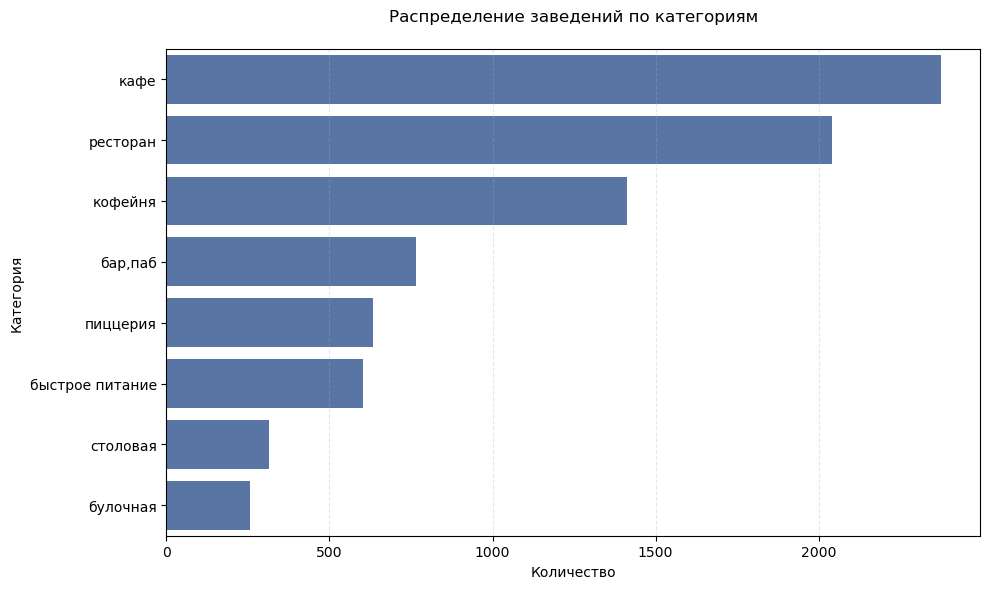

In [29]:
# Распределение заведений по категориям
plt.figure(figsize=(10, 6))

# Создаем countplot
ax = sns.countplot(
    data=df, 
    y='category',
    order=df['category'].value_counts().index,
    color='#4C72B0'  
)

# Настройки графика
plt.title('Распределение заведений по категориям', pad=20)
plt.xlabel('Количество')
plt.ylabel('Категория')
plt.grid(axis='x', linestyle='--', alpha=0.3)   
plt.tight_layout()
plt.show()

1. Лидеры по количеству:
    + `кафе (2376)` - сама многочисленная категория
    + `рестораны (2042) и кофейни (1412)` - также значимые показатели
    + `бары/пабы (764)` - значимая доля в сегменте
2. Специализированные форматы:
    + `Пиццерии (633)` - популярный формат
    + `Быстрое питание (603)` - относительно небольшое количество  
3. Малые категори:
    + `Столовые (315)` - незначительное присутствие
    + `Булочные (256)` - нишевый сегмент

2. Какие административные районы Москвы присутствуют в данных? Исследовать распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводить подходящими визуализациями

In [30]:
# Проверим все административные округа Москвы в данных
districts = df['district'].unique()
print("Административные округа Москвы в данных:")
print(sorted(districts))

Административные округа Москвы в данных:
['Восточный административный округ', 'Западный административный округ', 'Северный административный округ', 'Северо-Восточный административный округ', 'Северо-Западный административный округ', 'Центральный административный округ', 'Юго-Восточный административный округ', 'Юго-Западный административный округ', 'Южный административный округ']


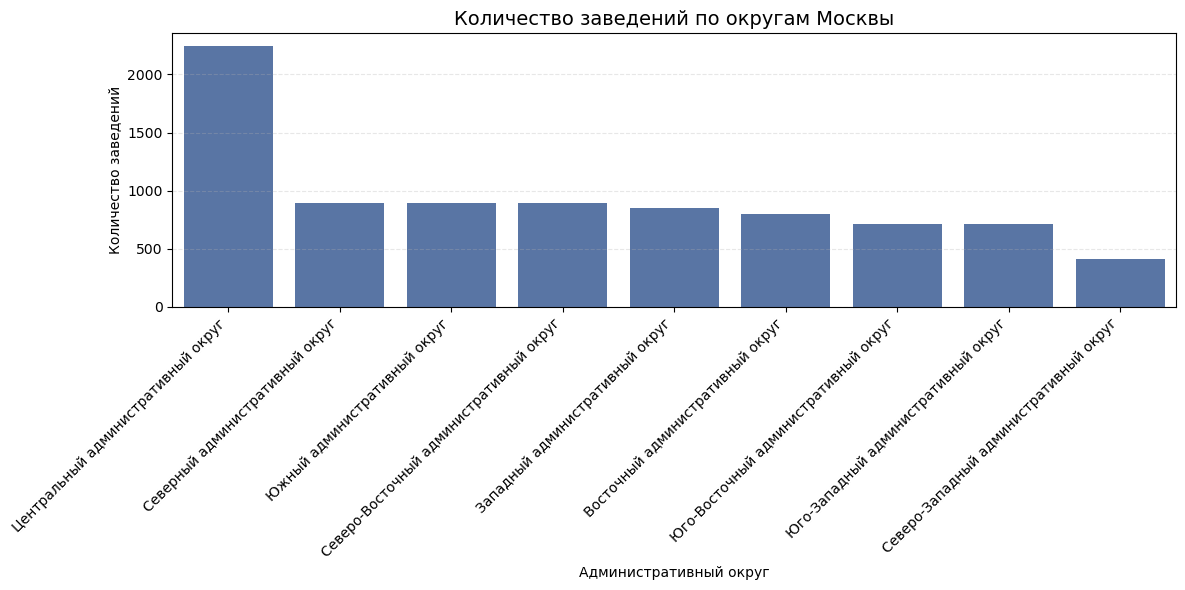

In [31]:
# Распределение заведений по округам
plt.figure(figsize=(12, 6))
district_counts = df['district'].value_counts()

# Создаем barplot
ax = sns.barplot(
    x=district_counts.index,
    y=district_counts.values,
    color='#4C72B0'  # Стандартный синий цвет seaborn
)

# Настройки отображения
plt.title('Количество заведений по округам Москвы', fontsize=14)
plt.xlabel('Административный округ')
plt.ylabel('Количество заведений')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

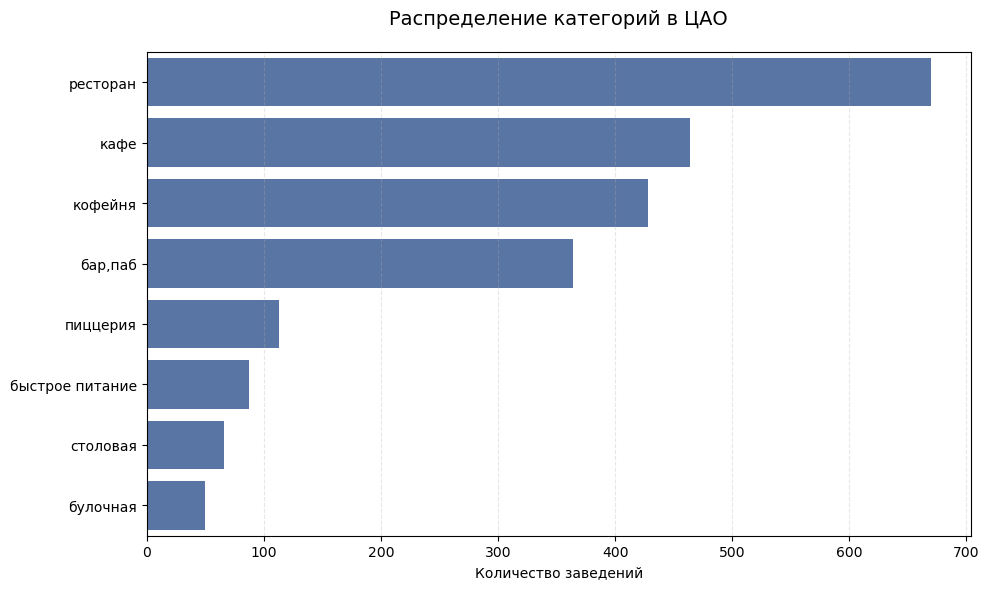

In [32]:
# Фильтрация данных
central_df = df[df['district'] == 'Центральный административный округ']

# Подготовка порядка категорий
category_order = central_df['category'].value_counts().index

# Построение графика
plt.figure(figsize=(10, 6))

# Создаем countplot
ax = sns.countplot(
    data=central_df, 
    y='category',
    order=category_order,
    color='#4C72B0'  
)

# Оформление
plt.title('Распределение категорий в ЦАО', fontsize=14, pad=20)
plt.xlabel('Количество заведений')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

**В административных округах Москвы присутствуют следующие округа:**
+ Восточный административный округ
+ Западный административный округ
+ Северный административный округ
+ Северо-Восточный административный округ
+ Северо-Западный административный округ
+ Центральный административный округ
+ Юго-Восточный административный округ
+ Юго-Западный административный округ
+ Южный административный округ

Значительное количество заведений находится в `Центральном административном округе (ЦАО)`, свыше 2000 заведений, из них свыше 650 это рестораны, свыше 450 это кафе, и тройку замыкают кофейни, свыше 400 заведений

Вторую позицию делят `Северный административный округ (САО)` и `Южный (ЮАО)`, свыше 550 заведений и в тройку округов попадает `Северо-Восточный (СВАО)`

3. Изучить соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследовать данные, ответить на вопросы и построить необходимые визуализации

Соотношение сетевых и несетевых заведений:
• Сетевые: 38.1%
• Несетевые: 61.9%


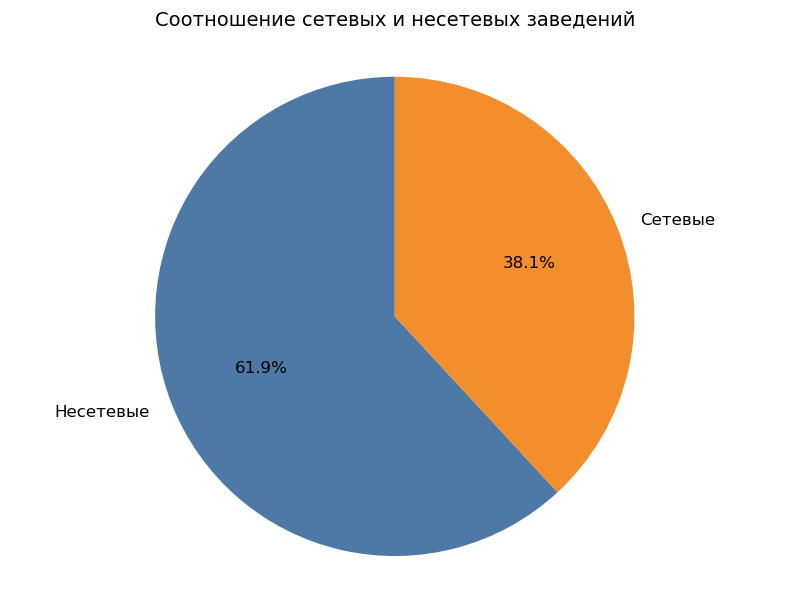

In [33]:
# Общая статистика
chain_stats = df['chain'].value_counts(normalize=True) * 100
print("Соотношение сетевых и несетевых заведений:")
print(f"• Сетевые: {chain_stats[1]:.1f}%") if 1 in chain_stats else print("• Сетевые: 0%")
print(f"• Несетевые: {chain_stats[0]:.1f}%")

# Визуализация 
plt.figure(figsize=(8, 6))

# Данные для диаграммы
labels = ['Несетевые', 'Сетевые']
sizes = df['chain'].value_counts().sort_index().values
colors = ['#4e79a7', '#f28e2b']

# Создаем круговую диаграмму
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    textprops={'fontsize': 12}
)

# Добавляем заголовок
plt.title('Соотношение сетевых и несетевых заведений', fontsize=14, pad=20)

# Делаем диаграмму круглой
plt.axis('equal')
plt.tight_layout()
plt.show()


Топ-5 самых сетевых категорий:
category
булочная           61.328125
пиццерия           52.132701
кофейня            50.920680
быстрое питание    38.474295
ресторан           35.700294


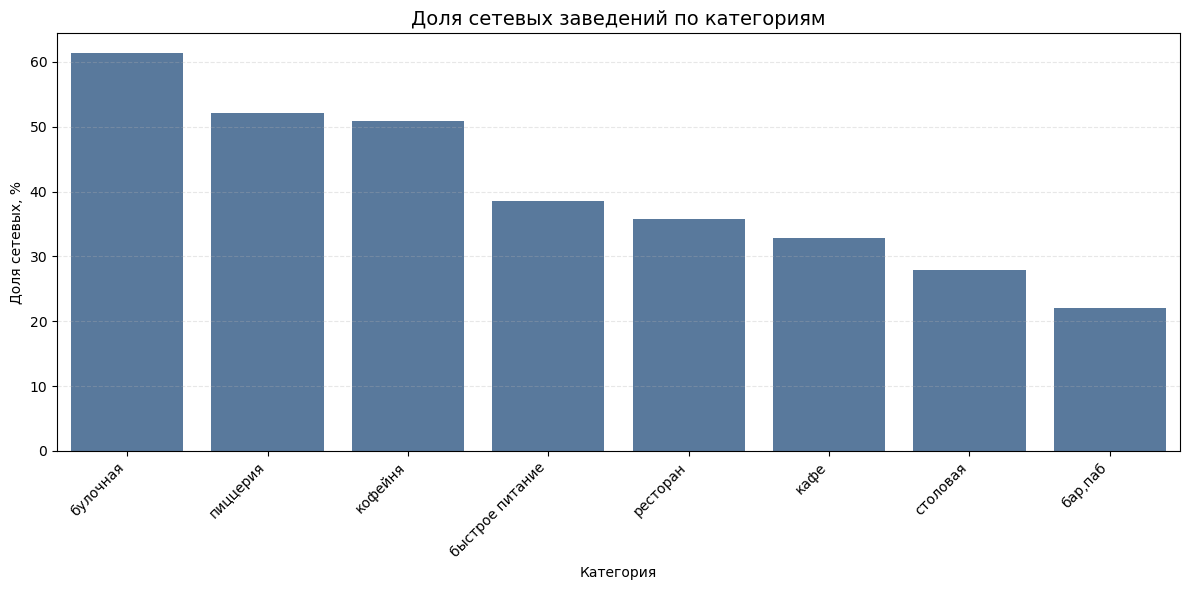

In [34]:
# Группировка по категориям
category_chain = df.groupby('category')['chain'].mean().sort_values(ascending=False) * 100

# Топ-5 самых "сетевых" категорий
print("\nТоп-5 самых сетевых категорий:")
print(category_chain.head(5).to_string())

# Визуализация 
plt.figure(figsize=(12, 6))

# Создаем barplot
ax = sns.barplot(
    x=category_chain.index,
    y=category_chain.values,
    color='#4e79a7'  
)

# Оформление
plt.title('Доля сетевых заведений по категориям', fontsize=14)
plt.xlabel('Категория')
plt.ylabel('Доля сетевых, %')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

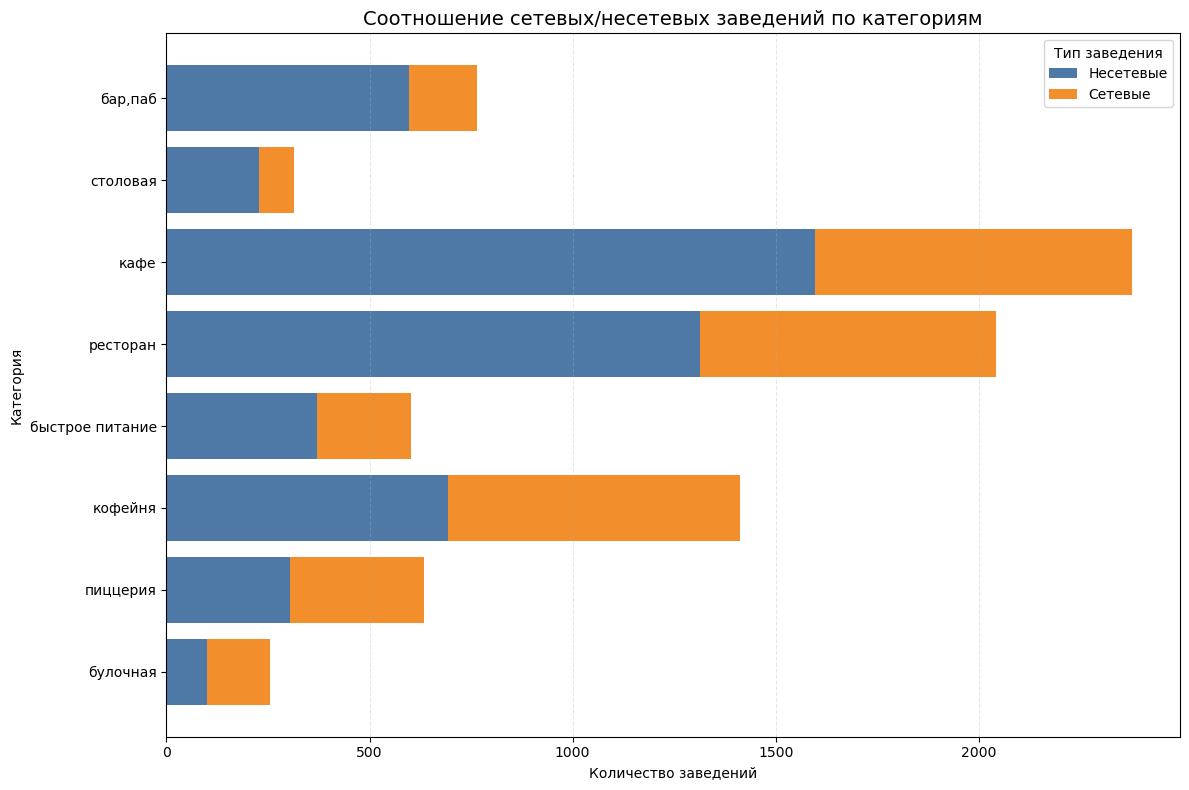

In [35]:
# Создаем кросс-таблицу
cross_tab = pd.crosstab(
    index=df['category'],  # Строки - категории
    columns=df['chain'],   # Колонки - сетевой/несетевой (0/1)
    colnames=[None]        # Убираем название колонки
)

# Переименовываем колонки для понятности
cross_tab = cross_tab.rename(columns={0: 'Несетевые', 1: 'Сетевые'})

# Добавляем расчет доли
cross_tab['Доля_сетевых'] = cross_tab['Сетевые'] / (cross_tab['Сетевые'] + cross_tab['Несетевые'])

# Сортируем по доле сетевых
cross_tab_sorted = cross_tab.sort_values('Доля_сетевых', ascending=False)

# Визуализация
plt.figure(figsize=(12, 8))
colors = ['#4e79a7', '#f28e2b']  # Синий для несетевых, оранжевый для сетевых
bottom = None

# Используем нужные колонки
for i, col in enumerate(['Несетевые', 'Сетевые']):
    plt.barh(
        cross_tab_sorted.index,
        cross_tab_sorted[col],
        left=bottom,
        color=colors[i],
        label=col
    )
    bottom = cross_tab_sorted[col] if bottom is None else bottom + cross_tab_sorted[col]

# Оформление
plt.title('Соотношение сетевых/несетевых заведений по категориям', fontsize=14)
plt.xlabel('Количество заведений')
plt.ylabel('Категория')
plt.legend(title='Тип заведения')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

+ В Москве преобладают несетевые заведения **`61.9% против 38.1% сетевых`**
+ Соотношение ≈ 3:2 в пользу независимых бизнесов

**ТОП-5 самых сетевых категорий:**
+ 🥐 `Булочные 61.3%` - лидер по доле сетевых заведений
+ 🍕 `Пиццерии 52.1%` - популярный франчайзинговый формат
+ ☕ `Кофейни 50.9%` - высокая концентрация брендов
+ 🍔 `Фастфуд/быстрое питание 38.5%` - стандартизированные концепции
+ 🍽️ `Рестораны 35.7%` - развитая сетевая конкуренция

**Ключевые наблюдения:**
+ Булочные неожиданно вышли в лидеры по доле сетевых заведений
+ Традиционные лидеры (пиццерии и кофейни) сохраняют высокие показатели
+ Наименьшая сетевая представленность у `баров 22%` и `столовых 27.9%`

`Данные показывают, что сетевые операторы активнее всего развиваются в сегментах с высокой маржинальностью и возможностью стандартизации процессов`

4. Исследовать количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведисти для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводить подходящими визуализациями

Общая статистика по посадочным местам:
count    4792.0
mean      108.4
std       122.8
min         0.0
25%        40.0
50%        75.0
75%       140.0
max      1288.0
Name: seats, dtype: float64


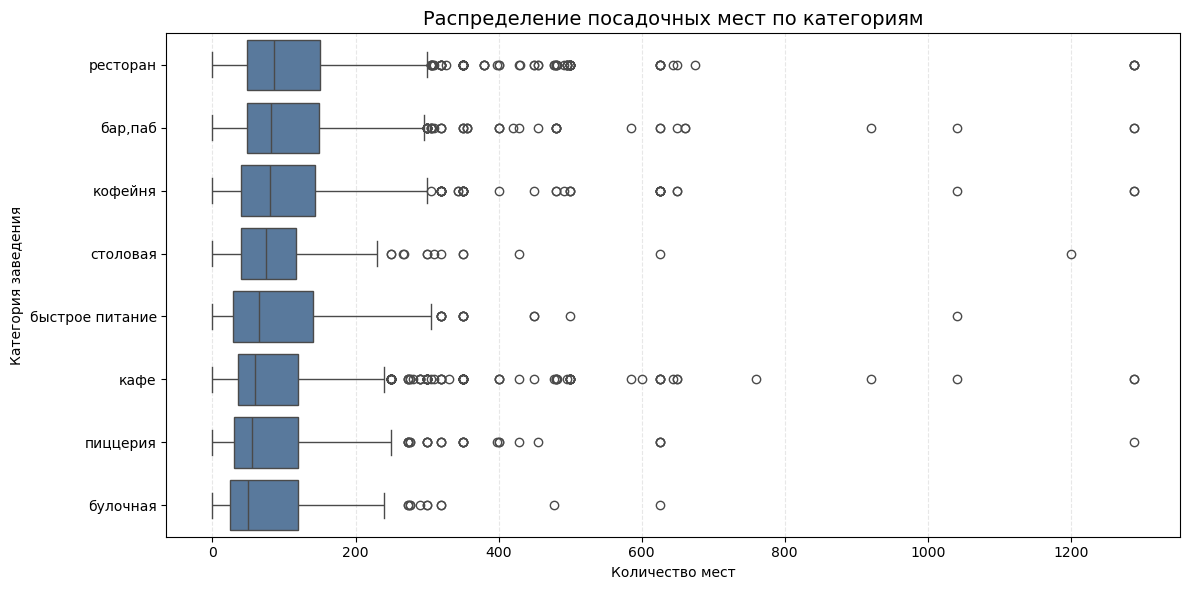

In [36]:
# Описательная статистика
print("Общая статистика по посадочным местам:")
print(df['seats'].describe().round(1))  

# Подготовка данных - сортировка категорий по медиане
plt.figure(figsize=(12, 6))

if 'category' in df.columns:
    # Сортируем категории по медиане мест
    order = df.groupby('category')['seats'].median().sort_values(ascending=False).index
    
    sns.boxplot(
        data=df,
        y='category',  
        x='seats',
        color='#4e79a7',
        order=order  # Сортировка по медиане
    )
    plt.ylabel('Категория заведения')
else:
    sns.boxplot(
        data=df,
        x='seats',
        color='#4e79a7' 
    )

# Оформление
plt.title('Распределение посадочных мест' + (' по категориям' if 'category' in df.columns else ''), 
          fontsize=14)
plt.xlabel('Количество мест')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [37]:
# Статистический метод (IQR):
Q1 = df['seats'].quantile(0.25)  # 48 мест
Q3 = df['seats'].quantile(0.75)  # 90 мест
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR       # ~153 места
print(f"• 25й перцентиль: {Q1}")
print(f"• 75й перцентиль: {Q3}")
print(f"• IQR: {IQR}")
print(f"• Верхняя граница: {upper_bound}")

• 25й перцентиль: 40.0
• 75й перцентиль: 140.0
• IQR: 100.0
• Верхняя граница: 290.0


<function matplotlib.pyplot.show(close=None, block=None)>

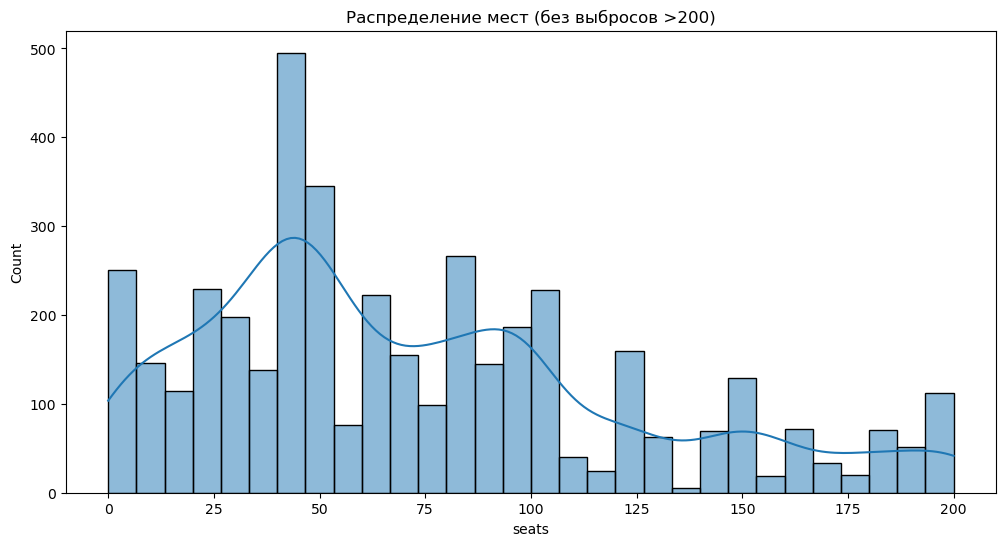

In [38]:
# Гистограмма распределния
plt.figure(figsize=(12, 6))
sns.histplot(df[df['seats'] <= 200]['seats'], bins=30, kde=True)
plt.title('Распределение мест (без выбросов >200)')
plt.show


Типичное количество мест (медиана):
category
ресторан           86.0
бар,паб            82.0
кофейня            80.0
столовая           75.5
быстрое питание    65.0
кафе               60.0
пиццерия           55.0
булочная           50.0


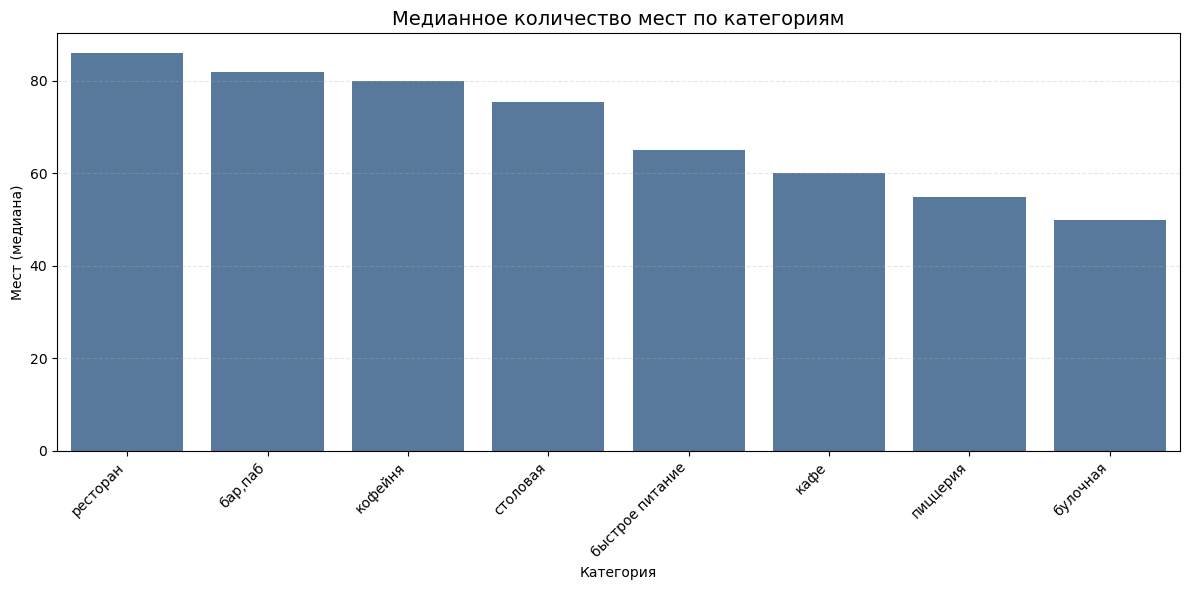

In [39]:
# Расчет медианного количества мест
median_seats = df.groupby('category')['seats'].median().sort_values(ascending=False)
print("\nТипичное количество мест (медиана):")
print(median_seats.to_string())

# Визуализация 
plt.figure(figsize=(12, 6))

# Создаем barplot
ax = sns.barplot(
    x=median_seats.index,
    y=median_seats.values,
    color='#4e79a7'  
)

# Оформление графика
plt.title('Медианное количество мест по категориям', fontsize=14)
plt.xlabel('Категория')
plt.ylabel('Мест (медиана)')
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

**1. На основе описательной статистики можно выделить следующее:**
+ Максимальное значение `1288 мест`
+ 75й перцентиль `140 мест` vs максимум `1288 мест` - разрыв слишком большой
+ Среднее `108.4` значительно выше медианы `75` - признак правосторонних выбросов
+ Верхняя граница = `290 мест`, то есть свыше > 290 мест статистически считается аномалией

**2. Основные выводы по медианным значениям**

Лидеры по вместимости:
+ 🍽️ `Рестораны - 86 мест`
+ 🍻 `Бары/пабы - 82 мест`
+ ☕ `Кофейни - 80 мест`

  
Средние показатели:
+ 🥘 `Столовые - 75 мест`
+ 🍔 `Быстрое питание - 65 мест`
+ 🍰 `Кафе - 60 мест`


Низкие показатели:
+ 🍕 `Пиццерии - 55 мест`
+ 🥐 `Булочные - 50 мест`

5. Исследовать рейтинг заведений. Визуализировать распределение средних рейтингов по категориям заведений. Понять, сильно ли различаются усреднённые рейтинги для разных типов общепита

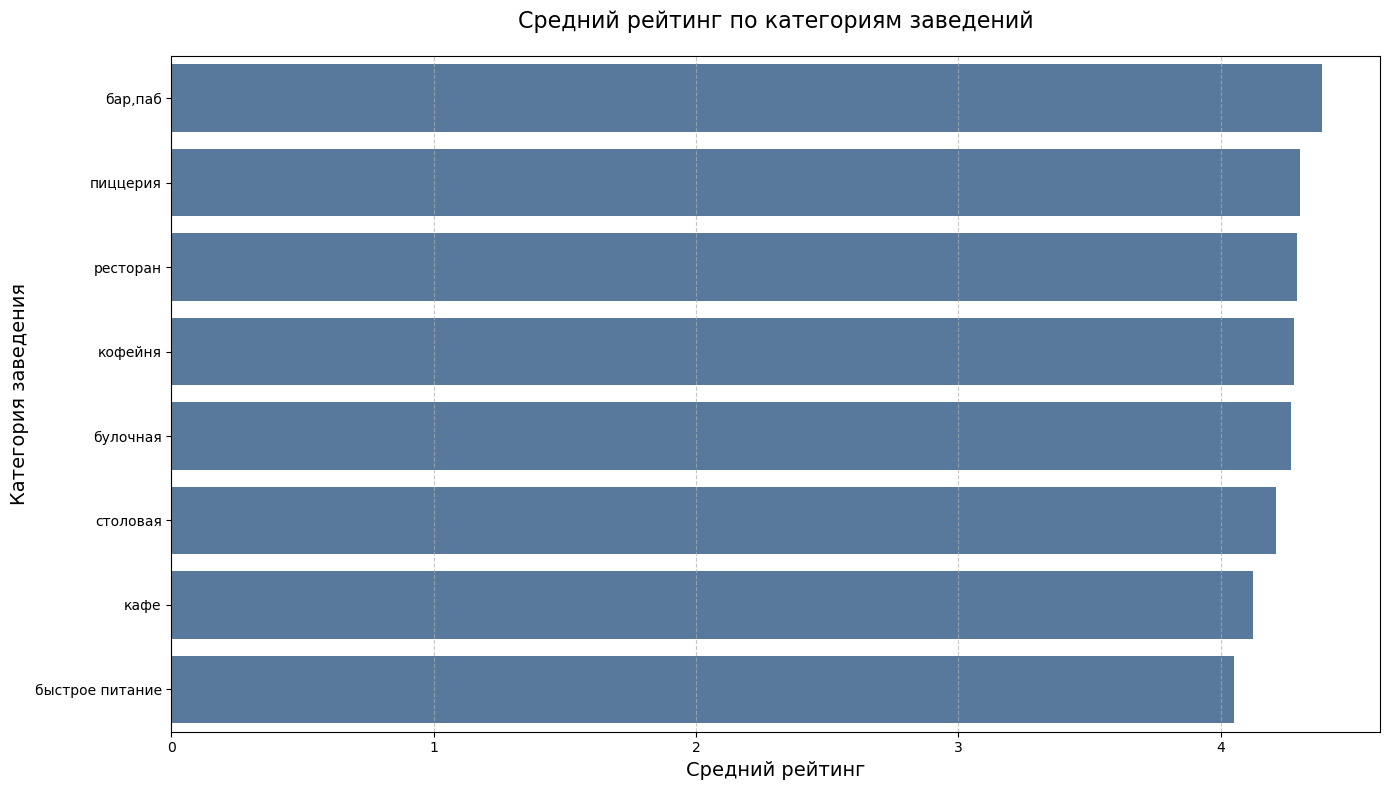

In [40]:
# Группируем данные по категориям и рассчитываем средний рейтинг
rating_by_category = df.groupby('category')['rating'].mean().reset_index()

# Сортируем категории по среднему рейтингу (по убыванию)
rating_by_category = rating_by_category.sort_values(by='rating', ascending=False)

# Создаем график
plt.figure(figsize=(14, 8))

# Используем горизонтальную столбчатую диаграмму
sns.barplot(
    data=rating_by_category,
    y='category',  # Категории по оси Y
    x='rating',   # Средний рейтинг по оси X
    color='#4e79a7',
    order=rating_by_category['category']  # Сортировка категорий по среднему рейтингу
)

# Оформление графика
plt.title('Средний рейтинг по категориям заведений', fontsize=16, pad=20)
plt.xlabel('Средний рейтинг', fontsize=14)
plt.ylabel('Категория заведения', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

На основе представленного `barplot`, который показывает **Средний рейтинг по категориям**, можно сделать следующие наблюдения:

+ `бар, паб` имеет самый высокий средний рейтинг , что указывает на то, что бары и пабы получают наиболее положительные оценки клиентов (около 4.5)
+ `пиццерия`, `ресторан`, `кофейня` и `булочная` имеют практически одинаковый средний рейтинг (около 4.3–4.4)
+ `столовая` также имеет высокий средний рейтинг (около 4.2)
+ `кафе` имеет чуть более низкий средний рейтинг (около 4.1)
+ `быстрое питание` имеет самый низкий средний рейтинг среди всех категорий (около 4.0)
  
**Ключевые моменты:**
+ Для инвесторов из фонда **`Shut Up and Take My Money`** можно рассмотреть `бары/пабы` - стабильный спрос и качество
+ Избегать категории `быстрого питания` без детального аудита
+ Если рекомендовать владельцам `пиццерий`, `ресторанов`,`кофеен`, `булочных`, то тут можно предложить повысить средний чек, через премиум-линейки, `кафе` усилить маркетинг, т.к., при хороших показателях нет ярких конкурентных преимуществ

6. Изучить, с какими данными показывают самую сильную корреляцию рейтинги заведений? Построить и визуализировать матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выбрать самую сильную связь и проверить её

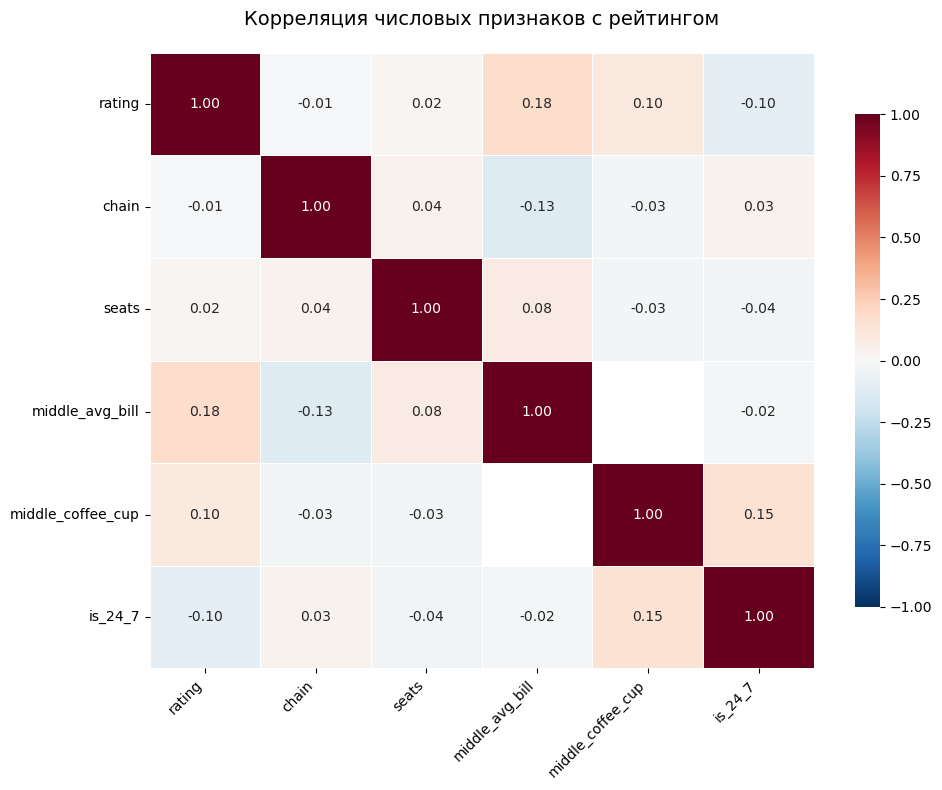

In [41]:
# Строим корреляцию только для числовых признаков
numeric_cols = ['rating', 'chain', 'seats', 'middle_avg_bill', 'middle_coffee_cup', 'is_24_7']
corr_matrix = df[numeric_cols].corr()

# Визуализация 
plt.figure(figsize=(10, 8))

# Используем heatmap 
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='RdBu_r',  
    vmin=-1,
    vmax=1,
    center=0,
    fmt='.2f',
    linewidths=0.5,  
    cbar_kws={'shrink': 0.8} 
)

# Оформление графика
plt.title('Корреляция числовых признаков с рейтингом', pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)  
plt.tight_layout()
plt.show()

interval columns not set, guessing: ['middle_avg_bill', 'rating', 'chain']


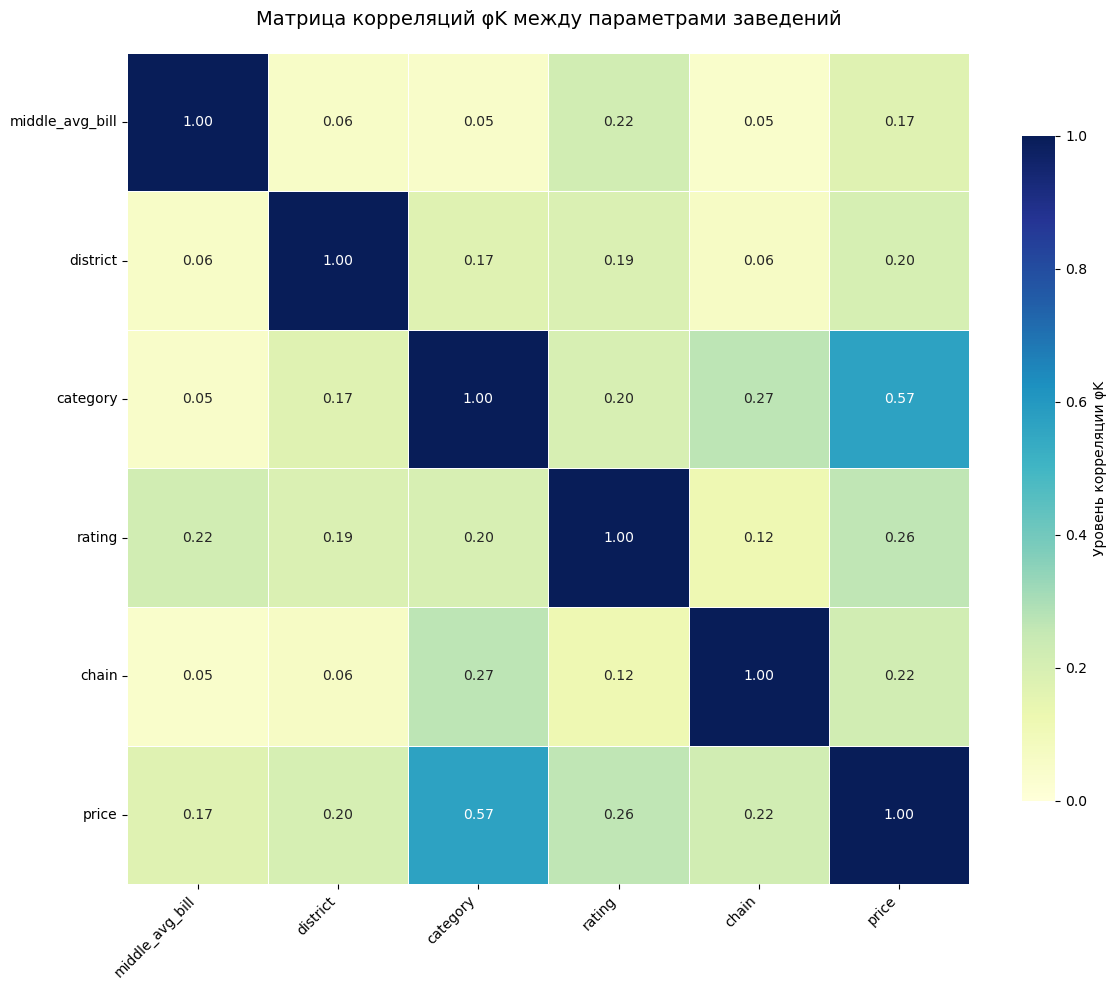

In [42]:
# Проведем анализ корреляций φK (Phik) между числовыми и категориальными столбцами:

# Создаем копию данных для анализа
df_corr = df[['middle_avg_bill', 'district', 'category', 'rating', 'chain', 'price']].copy()

# Рассчитываем матрицу корреляций φK
corr_matrix = df_corr.phik_matrix()

# Создаем визуализацию 
plt.figure(figsize=(12, 10))

# Используем heatmap 
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='YlGnBu',
    vmin=0,
    vmax=1,
    linewidths=0.5,
    cbar_kws={'label': 'Уровень корреляции φK', 'shrink': 0.8}
)

# Оформление графика
plt.title('Матрица корреляций φK между параметрами заведений', pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Проанализировав корреляцию `Пирсона` и матрицу корреляции `φK (Phik)` можно сделать следующие выводы:

**1. Первый график: Корреляция числовых признаков с рейтингом**

**`rating` vs. другие переменные**:
   - Сильная положительная корреляция с `middle_avg_bill` **0.18**: Заведения с более высоким средним чеком `middle_avg_bill` имеют тенденцию к более высоким рейтингам
   - Маленькая отрицательная корреляция с `chain` **-0.01**: Сетевые заведения `chain` имеют незначительно более низкие рейтинги, чем несетевые
   - Небольшая положительная корреляция с `seats` **0.02**: Заведения с большим количеством мест `seats` имеют незначительно более высокие рейтинги
   - Положительная корреляция с `middle_coffee_cup` **0.10**: Заведения с более высокой средней стоимостью кофе/чая `middle_coffee_cup` имеют незначительно более высокие рейтинги.
   - Отрицательная корреляция с `is_24_7` **-0.10**: Заведения, работающие круглосуточно `is_24_7`, имеют незначительно более низкие рейтинги

**Другие корреляции**:
   - Между `chain` и `middle_avg_bill` есть слабая отрицательная корреляция **-0.03**: Сетевые заведения `chain` имеют незначительно более низкий средний чек `middle_avg_bill`
   - Между `seats` и `middle_avg_bill` есть слабая положительная корреляция **0.08**: Заведения с большим количеством мест `seats` имеют незначительно более высокий средний чек `middle_avg_bill`

**2. Второй график: Матрица корреляций φK (Phik)**

**`rating` vs. другие переменные**:
   - Слабая положительная корреляция с `category` **0.20**: Определенные категории заведений `category` могут иметь более высокие рейтинги
   - Слабая положительная корреляция с `chain` **0.12**: Сетевые заведения `chain` незначительно могут влиять на рейтинги заведений

2. **Другие корреляции**:
   - Между `chain` и `category` есть слабая положительная корреляция **0.27**: Некоторые категории заведений `category` чаще представлены в сети `chain`
   - Между `category` и `district` есть слабая положительная корреляция **0.17**: Расположение заведений по округам `district` может зависеть от их категории `category`

**`price` vs. другие переменные**: 

   - Сильная положительная корреляция с `category` **0.57**: Категории заведений сильно влияют на цены. Например, рестораны или более престижные категории могут иметь более высокие цены. В то время как, бюджетные категории (например, столовые или кафе) могут иметь более низкие цены
   - Маленькая положительная корреляция с `middle_avg_bill` **0.17**: Указывает на слабую связь между средней стоимостью чека и ценами. Это может быть связано с тем, что средняя стоимость чека `middle_avg_bill` зависит не только от цены, но и от других факторов, таких как порции, дополнительные услуги и т.д
   
**Другие корреляции**:
   - Средняя корреляция между `price и другими переменными (district, rating, chain)` низкая:
        + `district`: **0.20**
        + `rating`: **0.26**
        + `chain`: **0.22**

Таким образом, из анализа видно, что самая сильная корреляция наблюдается между **`price` и `category`** с коэффициентом корреляции `0.57` и является наиболее значимым фактором, определяющим цены 

Расположение `district` и средняя стоимость чека `middle_avg_bill`, также имеют некоторое влияние, но оно значительно меньше, чем у категории

Цены `price` слабо коррелируют с рейтингами `rating`. Это означает, что высокие цены не обязательно гарантируют высокие рейтинги

Далее, корреляция между `rating` и `middle_avg_bill`, с коэффициентом корреляции `0.18` показывает, что заведения с более высокими средними чеками, вероятно, предлагают лучшее качество продуктов или услуг, что положительно влияет на оценки клиентов 

Стоит отметить слабую положительную корреляцию рейтинга с категорией заведения `category` и округов `district`, что может говорить о незначительном влиянии типа заведения и его локации на удовлетворенность посетителей. Остальные числовые признаки, такие как сетевые заведения `chain`, работа круглосуточно `is_24_7` и количество посадочных мест `seats`, показывают лишь незначительную связь с рейтингами, что указывает на их меньшую роль в формировании клиентских предпочтений

7. Сгруппировать данные по названиям заведений и найти топ-15 популярных сетей в Москве. Для них посчитать значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводить подходящими визуализациями

Топ-15 сетевых заведений Москвы:
                                     count  avg_rating  category
name_norm                                                       
шоколадница                            120    4.177500   кофейня
доминос пицца                           76    4.169737  пиццерия
додо пицца                              74    4.286487  пиццерия
one price coffee                        71    4.064789   кофейня
яндекс лавка                            69    3.872464  ресторан
cofix                                   65    4.075385   кофейня
prime                                   50    4.116000  ресторан
хинкальная                              44    4.322727      кафе
кофепорт                                42    4.147619   кофейня
кулинарная лавка братьев караваевых     39    4.394872      кафе
теремок                                 38    4.123684  ресторан
чайхана                                 37    3.924324      кафе
cofefest                                32    3.984375   

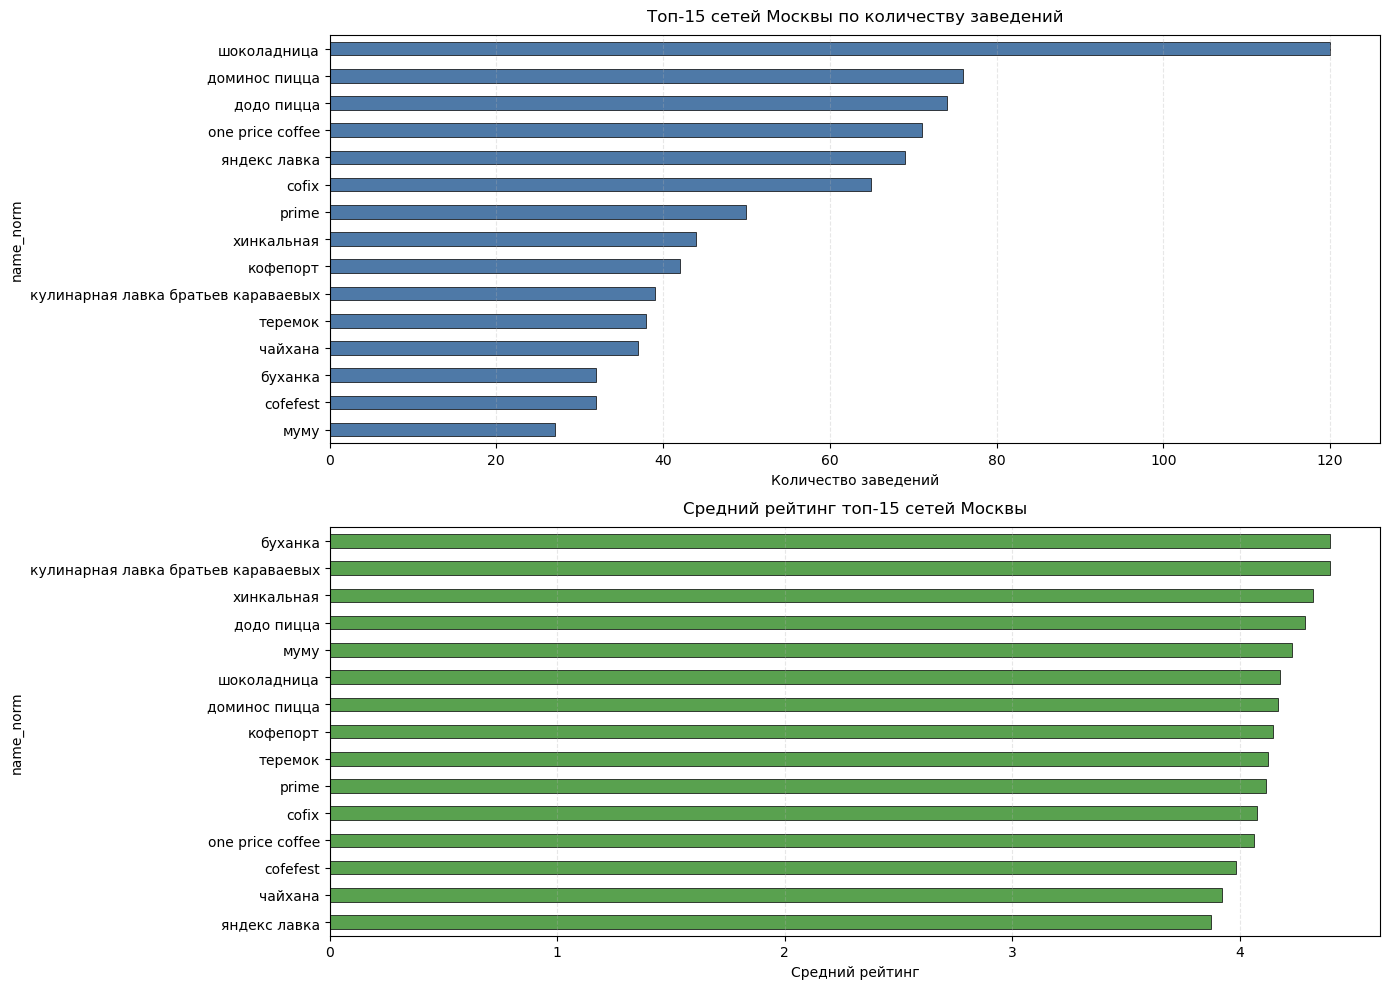

In [43]:
# Выбираем сетевые заведения
chains_moscow = df[df['chain'] == 1]

# Топ-15 сетей по количеству заведений с агрегацией
result = chains_moscow.groupby('name_norm').agg(
    count=('name_norm', 'size'),  # количество заведений
    avg_rating=('rating', 'mean'),  # средний рейтинг
    category=('category', lambda x: x.value_counts().index[0])  # самая частая категория
).sort_values('count', ascending=False).head(15)

# Вывод таблицы результатов
print("Топ-15 сетевых заведений Москвы:")
print(result.to_string())

# Визуализация 
plt.figure(figsize=(14, 10))

# График количества заведений
plt.subplot(2, 1, 1)
result['count'].sort_values().plot(
    kind='barh',
    color='#4e79a7',  
    edgecolor='black',
    linewidth=0.5
)
plt.title('Топ-15 сетей Москвы по количеству заведений', pad=10)
plt.xlabel('Количество заведений')
plt.grid(axis='x', linestyle='--', alpha=0.3)

# График среднего рейтинга
plt.subplot(2, 1, 2)
result['avg_rating'].sort_values().plot(
    kind='barh',
    color='#59a14f',  
    edgecolor='black',
    linewidth=0.5
)

# Оформление
plt.title('Средний рейтинг топ-15 сетей Москвы', pad=10)
plt.xlabel('Средний рейтинг')
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

**Самые популярные сети (по количеству заведений):**
+ `«шоколадница» 120` и `«доминос пицца» 76` — лидеры по охвату
+ `«додо пицца» 74` ненамного отстаёт, формируя тройку лидеров
+ Далее идут кофейни `one price coffee 71`, `cofix 65`; рестораны `яндекс лавка 69`, `prime 50`; кафе (`хинкальная 44`)

**Средний рейтинг:**
+ Выше всего у `«буханка» 4.39`, `«кулинарная лавка братьев караваевых» 4.39` и `«хинкальная» 4.32`
+ Ниже всего у `яндекс лавка 3.87` и `«чайхана» 3.92`

**Категории**
+ Кофейни доминируют `шоколадница, сofix, кофепорт, сofefest`
+ Пиццерии `«додо», «доминос»` и рестораны `хинкальная, муму, prime, теремок` тоже хорошо представлены

`Вследствие этого, можно сделать вывод, что Москва любит кофейни ☕ и пиццу 🍕, но самые высокие оценки у буханки - хлебушек 🍞 любят все`

8. Изучить вариацию среднего чека заведения (столбец middle_avg_bill) в зависимости от района Москвы. Проанализировать цены в центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводить подходящими визуализациями

In [44]:
# Удаляем пропуски в среднем чеке
df_clean = df.dropna(subset=['middle_avg_bill'])

# Проверяем количество заведений по округам
district_counts = df_clean['district'].value_counts()
print("Количество заведений по округам:")
print(district_counts.to_string())  

# Средний чек по округам 
avg_bill_by_district = df_clean.groupby('district')['middle_avg_bill'].mean().sort_values(ascending=False)
print("\nСредний чек по округам (руб.):")
print(avg_bill_by_district.round(2).to_string()) 

# Сравнение ЦАО с другими округами
cao_mask = df_clean['district'] == 'Центральный административный округ'
cao_avg = df_clean[cao_mask]['middle_avg_bill'].mean()
other_avg = df_clean[~cao_mask]['middle_avg_bill'].mean()

print("\nСравнение средних чеков:")
print(f"- ЦАО: {cao_avg:.2f} руб.")
print(f"- Другие округа: {other_avg:.2f} руб.")
print(f"- Разница: {cao_avg - other_avg:.2f} руб. ({((cao_avg/other_avg)-1)*100:.1f}%)")

Количество заведений по округам:
district
Центральный административный округ         1060
Северный административный округ             322
Южный административный округ                314
Западный административный округ             306
Северо-Восточный административный округ     301
Восточный административный округ            260
Юго-Западный административный округ         235
Юго-Восточный административный округ        194
Северо-Западный административный округ      157

Средний чек по округам (руб.):
district
Центральный административный округ         1191.060059
Западный административный округ            1053.229980
Северный административный округ             927.960022
Южный административный округ                834.400024
Северо-Западный административный округ      822.219971
Восточный административный округ            820.630005
Юго-Западный административный округ         792.559998
Северо-Восточный административный округ     716.609985
Юго-Восточный административный округ        6

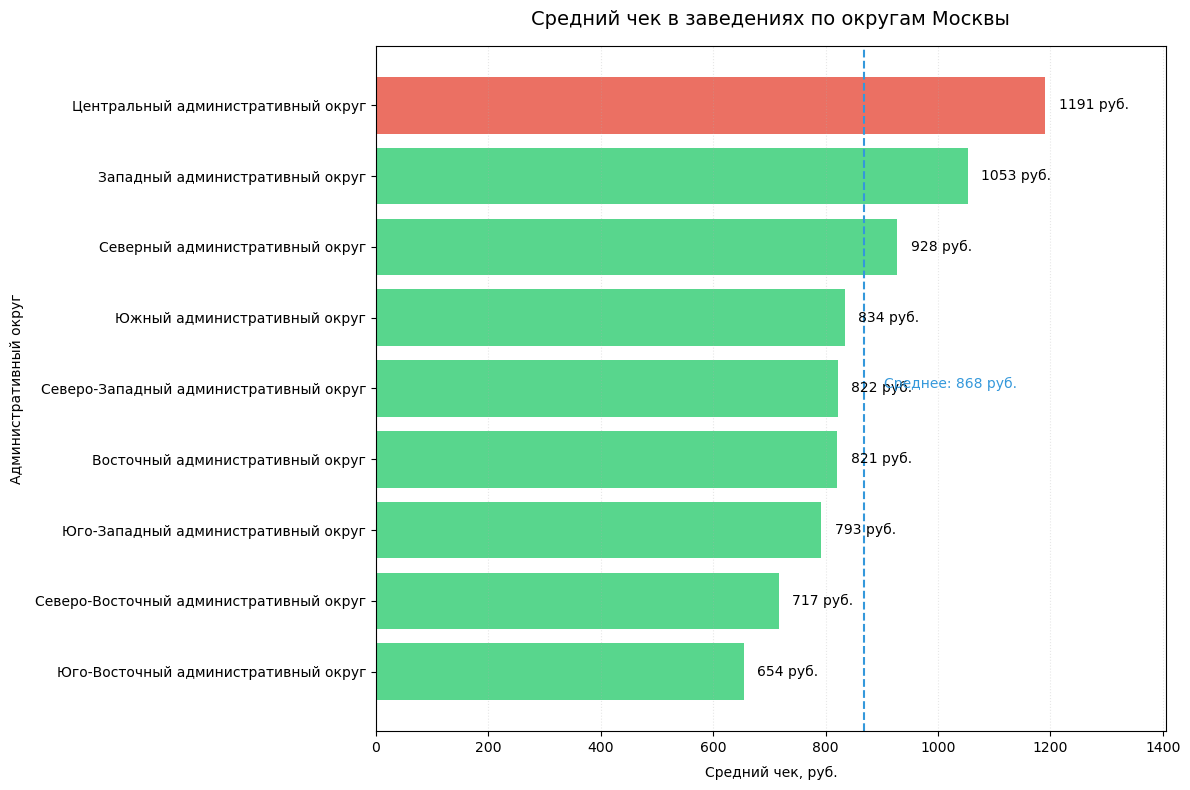

In [45]:
# Создаем данные для визуализации
data = avg_bill_by_district.sort_values()

# Строим график
plt.figure(figsize=(12, 8))

# Цвета для столбцов
colors = ['#e74c3c' if x == 'Центральный административный округ' else '#2ecc71' for x in data.index]
bars = plt.barh(data.index, data.values, color=colors, alpha=0.8)

# Добавляем значения на график
for bar in bars:
    width = bar.get_width()
    plt.text(width + max(data.values)*0.02, 
             bar.get_y() + bar.get_height()/2,
             f'{width:.0f} руб.',
             va='center', 
             ha='left', 
             fontsize=10)

# Выделяем среднее значение по Москве
mean_val = data.mean()
plt.axvline(mean_val, color='#3498db', linestyle='--', linewidth=1.5)
plt.text(mean_val + max(data.values)*0.03, 
         0.5, 
         f'Среднее: {mean_val:.0f} руб.',
         transform=plt.gca().get_xaxis_transform(), 
         color='#3498db')

# Настройки оформления
plt.title('Средний чек в заведениях по округам Москвы', pad=15, fontsize=14)
plt.xlabel('Средний чек, руб.', labelpad=8)
plt.ylabel('Административный округ', labelpad=8)
plt.grid(axis='x', linestyle=':', alpha=0.3)
plt.xlim(0, data.max() * 1.18)
plt.tight_layout()
plt.show()

**Центр — дороже на 40%**. 
Средний чек в Центральном округе `1191 руб.` существенно превышает показатели других округов — разница составляет `351.23 руб. (+41.8%)`. Это подтверждает его статус самой премиальной зоны города.

**Топ-3 округов по ценам:**
+ Западный `1053 руб.` — бизнес-кластеры и элитное жильё
+ Северный `928 руб.` — развитая инфраструктура
+ Южный `834 руб.` — смешанная застройка
  
**Самые бюджетные:**
+ Юго-Восточный `654 руб.` — промзоны и спальные районы
+ Северо-Восточный `716 руб.` — удалённые локации
  
**География цен:**
Чётко прослеживается градиент от центра к окраинам:
+ Ближайшие к ЦАО округа (ЗАО, САО) дороже на 20-25%
+ Дальние (ЮВАО, СВАО) дешевле на 30-45%
  
**Рекомендации:**
+ Для премиальных заведений: ЦАО и ЗАО
+ Для демократичных форматов: ЮВАО и СВАО
+ В САО и ЮАО — золотая середина по цене/проходимости

`График наглядно показывает: чем ближе к центру, тем выше чек, при этом в ЦАО соседствуют люксовые рестораны и бюджетные кафе, объясняя большой разброс цен.`

## Шаг 4. Подведём итоги

**Общий профиль рынка общепита Москвы:**

Исследование выявило ключевые характеристики московского рынка общественного питания:

**1. Структура рынка:**
+ Доминируют `булочные 61%, пиццерии 52% и кофейни 51%`
+ `61.9% заведений — независимые, 38.1% — сетевые`
+ Наибольшая сетевизация у `булочных 61% и пиццерий 52%`
  
**2. Географическое распределение:**
+ ЦАО — абсолютный лидер `1060 заведений`, особенно по ресторанам и кафе
+ САО, ЮАО, ЗАО — вторичные кластеры `300-320 заведений`
+ СЗАО — наименее развитый округ `157 заведений`
  
**3. Ценовая сегментация:**
+ Чёткий градиент цен от центра к окраинам
+ Средний чек в ЦАО `1191 руб. на 41% выше`, чем в среднем по другим округам `840 руб.`

**Факторы успеха заведений**

**4. Рейтинг и ценообразование:**
+ Самая сильная корреляция `0.57` между ценой и категорией
+ Средний рейтинг по категориям (бар/паб) показывает самый высокий средний рейтинг `4.5`
  
**5. Вместимость:**
+ Оптимальный размер: `70-80 мест кофейни/рестораны/бары`
+ Аномалии (>200 мест) часто связаны с ошибками данных
  
**6. Сетевые тренды:**
+ Топ-3 сетей: `«шоколадница», «доминос пицца», «додо пицца»`
+ Самые высокорейтинговые сети: `«булочная» 4.4, «кулинарная лавка братьев Караваевых» 4.4`

### Рекомендации для инвесторов
**7. По форматам:**
+ `Премиум-сегмент: рестораны в ЦАО или ЗАО`
+ `Средний сегмент: кафе в САО/ЮАО`
+ `Бюджетный сегмент: пиццерии/фастфуд в ЮВАО`
  
**8. По локациям:**
+ Избегать гиперконкурентных точек в ЦАО
+ Рассмотреть перспективные районы:
    + `Северные округа (САО/СВАО) — баланс цены и трафика`
    + `Новые территории — растущий спрос`
      
**9. По позиционированию:**
+ Для сетевых проектов: `делать ставку на узнаваемость (как «Додо Пицца»)`
+ Для независимых заведений: `акцент на уникальность концепции`